### Classification
FIRA Big Data Platform < Data Mining >

### 1. Data
- 1-1. `german_classfication.csv`
- 1-2. Preprocessing : Dummy Variables & Scaling & Change Labels
- 1-3. Train-Test Split : `sklearn.model_selection.test_train_split`

### 2. Logistic Regression
- 2-1. `sklearn.linear_model.LogisticRegression`
- 2-2. Evaluation : Confusion Matrix & ROC Curve

### 3. Decision Tree
- 3-1. `sklearn.tree.DecisionTreeClassifier`
- 3-2. How Does it Decide? - Visualization of Decision Tree via `graphviz`
- 3-3. Interpret Clustering by Decision Tree

### 4. Random Forest
- 4-1. `sklearn.ensemble.RandomForestClassifier`
- 4-2. Evaluation Measure 'RMS' : `sklearn.metrics.mean_squared_error`

### 5. 실습 : 우량 등급 예측 모델 

### 1. Data
---

#### 1-1.  `german_classification.csv`
---
`german_classification.csv`는 독일 은행에 신용거래를 신청한 신청자 1000명의 데이터이다. 관찰번호(OBS#)를 제외하고 총 29개의 변수로 이루어져있으며, 각 신청자들의 '신용 등급'이 예측하고자 하는 변수이다. 신용 등급은 '우량(1)' 혹은 '불량(2)'으로 나누어지며, 각각 700명, 300명으로 구성되어 있다. 이 분석의 목적은 불량 등급일 사람을 미리 예측하여, 그들에게 신용 대출을 해주지 않도록 하는 것이다.

In [29]:
import pandas as pd

In [30]:
# 변수별 설명 : CodeList
pd.read_csv('CodeList-classification.csv').iloc[:, :4]

,변수명,설명,변수 종류,코드 설명
0,OBS#,관찰번호,-,일련번호
1,CHK_ACCT,당좌 예금 계좌 상태,범주형,"0 : 0 DM 미만, 1 : 0~200 DM 미만, 2 : 200 DM 이상, 3..."
2,DURATION,신용거래 개월 수,수치형,NaN
3,HISTORY,신용기록,범주형,"0 : 신용거래 없음, 1 : 기한 내 변제, 2 : 변제 기한 남음, 3 : 연체..."
4,NEW_CAR,신용목적,이진수형,신형 자동차 0 : 없음 1 : 있음
5,USED_CAR,신용목적,이진수형,중고 자동차 0 : 없음 1 : 있음
6,FURNITURE,신용목적,이진수형,가구/주방기기 0 : 없음 1 : 있음
7,RADIO/TV,신용목적,이진수형,라디오/TV 0 : 없음 1 : 있음
8,EDUCATION,신용목적,이진수형,교육 0 : 없음 1 : 있음
9,RETAINING,신용목적,이진수형,재교육 0 : 없음 1 : 있음


In [31]:
# df
df = pd.read_csv('german_classification.csv').set_index('OBS#')

#### 1-2. Preprocessing : Dummy Variables & Scaling & Change Labels

In [32]:
# dummy varaibles : preprocessed_df
get_dummies_cols = ['CHK_ACCT', 'HISTORY', 'SAV_ACCT', 'EMPLOYMENT', 'JOB']
dummied_df = pd.get_dummies(df, columns=get_dummies_cols)
dummied_df

,DURATION,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETAINING,AMOUNT,INSTALL_RATE,MALE_DIV,...,SAV_ACCT_4,EMPLOYMENT_0,EMPLOYMENT_1,EMPLOYMENT_2,EMPLOYMENT_3,EMPLOYMENT_4,JOB_0,JOB_1,JOB_2,JOB_3
OBS#,,,,,,,,,,,,,,,,,,,,,
0,6,0,0,0,1,0,0,1169,4,0,...,1,0,0,0,0,1,0,0,1,0
1,48,0,0,0,1,0,0,5951,2,0,...,0,0,0,1,0,0,0,0,1,0
2,12,0,0,0,0,1,0,2096,2,0,...,0,0,0,0,1,0,0,1,0,0
3,42,0,0,1,0,0,0,7882,2,0,...,0,0,0,0,1,0,0,0,1,0
4,24,1,0,0,0,0,0,4870,3,0,...,0,0,0,1,0,0,0,0,1,0
5,36,0,0,0,0,1,0,9055,2,0,...,1,0,0,1,0,0,0,1,0,0
6,24,0,0,1,0,0,0,2835,3,0,...,0,0,0,0,0,1,0,0,1,0
7,36,0,1,0,0,0,0,6948,2,0,...,0,0,0,1,0,0,0,0,0,1
8,12,0,0,0,1,0,0,3059,2,1,...,0,0,0,0,1,0,0,1,0,0


In [33]:
# scaling : min-max : (X - Xmin) / (Xmax - Xmin)
# classification 문제에서는 이다(1)/아니다(0) 라고 표현할 것이기 때문에 min-max scaling을 하는 것이 적절하다.
# 반면에 prediction 문제에서는 y값을 그대로 사용할 것이기 때문에 normalizing이 적절하다.
# scaling_cols
scaling_cols = ["DURATION", 'INSTALL_RATE', 'AGE', 'NUM_CREDITS', 'AMOUNT']
preprocessed_df = dummied_df.copy()
preprocessed_df[scaling_cols] = (preprocessed_df[scaling_cols] - preprocessed_df[scaling_cols].min()) /\
                                (preprocessed_df[scaling_cols].max() - preprocessed_df[scaling_cols].min())
preprocessed_df

,DURATION,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETAINING,AMOUNT,INSTALL_RATE,MALE_DIV,...,SAV_ACCT_4,EMPLOYMENT_0,EMPLOYMENT_1,EMPLOYMENT_2,EMPLOYMENT_3,EMPLOYMENT_4,JOB_0,JOB_1,JOB_2,JOB_3
OBS#,,,,,,,,,,,,,,,,,,,,,
0,0.029412,0,0,0,1,0,0,0.050567,1.000000,0,...,1,0,0,0,0,1,0,0,1,0
1,0.647059,0,0,0,1,0,0,0.313690,0.333333,0,...,0,0,0,1,0,0,0,0,1,0
2,0.117647,0,0,0,0,1,0,0.101574,0.333333,0,...,0,0,0,0,1,0,0,1,0,0
3,0.558824,0,0,1,0,0,0,0.419941,0.333333,0,...,0,0,0,0,1,0,0,0,1,0
4,0.294118,1,0,0,0,0,0,0.254209,0.666667,0,...,0,0,0,1,0,0,0,0,1,0
5,0.470588,0,0,0,0,1,0,0.484483,0.333333,0,...,1,0,0,1,0,0,0,1,0,0
6,0.294118,0,0,1,0,0,0,0.142236,0.666667,0,...,0,0,0,0,0,1,0,0,1,0
7,0.470588,0,1,0,0,0,0,0.368548,0.333333,0,...,0,0,0,1,0,0,0,0,0,1
8,0.117647,0,0,0,1,0,0,0.154561,0.333333,1,...,0,0,0,0,1,0,0,1,0,0


In [34]:
# change Label
preprocessed_df.RESPONSE = df.RESPONSE - 1
preprocessed_df.RESPONSE

OBS#
0      0
1      1
2      0
3      0
4      1
5      0
6      0
7      0
8      0
9      1
10     1
11     1
12     0
13     1
14     0
15     1
16     0
17     0
18     1
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     1
      ..
970    0
971    0
972    1
973    1
974    0
975    0
976    0
977    0
978    1
979    1
980    1
981    1
982    0
983    1
984    0
985    0
986    0
987    0
988    0
989    0
990    0
991    0
992    0
993    0
994    0
995    0
996    0
997    0
998    1
999    0
Name: RESPONSE, Length: 1000, dtype: int64

In [35]:
# split X, y 
X, y = preprocessed_df.drop('RESPONSE', axis = 1), preprocessed_df.RESPONSE

#### 1-3. Train-Test Split : `sklearn.model_selection.train_test_split`
---
지도학습을 위해 주어진 데이터를 train set과 test set으로 나눈다. 이 때, y의 class 비율 (class imbalance)을 고려해서 나누어준다.

In [36]:
# import packages
from sklearn.model_selection import train_test_split

In [37]:
# train_test_split with 'stratify' : class의 비율에 맞춰서 train과 test를 뽑아줌
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 77, stratify = y) # y의 비율을 맞춰서 뽑고 싶은 것이므로 조건이 y가 됨

In [38]:
# is it true...?
y_test[y_test==1].count() / (y_test[y_test == 1].count() + y_test[y_test == 0].count()) # yes, it is true!

0.29999999999999999

### 2. Logistic Regression
---

#### 2-1. `sklearn.linear_model.LogisticRegression`
---

In [91]:
# import packages
from sklearn.linear_model import LogisticRegression

In [92]:
# Parameters
class_weight = 'balanced' # 학습을 할 때 클래스의 비율을 맞춰줌. 반반씩 똑같이 해줌.
# fit_intercept = True # 상수를 넣을 것인지
# multi_class='ovr' # multinomial인 경우

- class imbalance가 있을 때 sample 수가 적은 class에 대해서는 상대적으로 학습이 덜 일어난다. 이러한 imbalance문제를 해결해주기 위해 class weight을 balanced로 맞춰줌.
- The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as 
> ***n_samples / (n_classes * np.bincount(y))**

In [93]:
# what does 'balanced' mean?
import numpy as np

#n_samples = len(y)
#n_classes = len(np.unique(y))
#class_weight = n_samples/(n_classes * np.bincount(y))

1000 / (2*np.bincount(y)) # class의 비중을 어떻게 볼 것인지 알 수 있음. 2는 클래스 갯수.
print(1000/(2*np.bincount(y))[0] * 700)
print(1000/(2*np.bincount(y))[1] * 300)

500.0
500.0


In [94]:
# lr_model
lr_model = LogisticRegression(class_weight = class_weight)

In [95]:
# fit to model
lr_model.fit(X = X_train, y = y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [101]:
# get predictions
lr_model.predict(X = X_test)

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [97]:
# get accuracy
lr_model.score(X = X_test, y = y_test) # accuracy를 보여줌

0.69999999999999996

In [98]:
# result_y_test_df 
result_y_test_df = pd.DataFrame(y_test)
result_y_test_df['lr'] = lr_model.predict(X = X_test)

#### 2-2. Evaluation : Confusion Matrix & ROC Curve
---

|  |0|1|
|--|-------------------------------|
|0|True Negative |False Positive|
|1|False Negative |True Positive|

In [109]:
# import packages for confusion matrix
from sklearn.metrics import confusion_matrix

In [110]:
# confusion_matrix
confusion_matrix(y_pred = lr_model.predict(X = X_test), y_true = y_test)
# [[ true negative , false positive],
# [false negative], [true positive]]

array([[120,  55],
       [ 20,  55]])

# ROC curve는 나중에 하겠음

In [140]:
# import pacakages for ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [141]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = {0: .2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
# decision_function - for 'thresholds'

In [ ]:
# roc_curve : fpr, tpr, thresholds

In [ ]:
# auc

plot_roc_curve(fpr, tpr, roc_auc) # 잠시 주석처리

### 3. Decision Tree
---

#### 3-1. `sklearn.tree.DecisionTreeClassifier`
---

In [111]:
# import packages
from sklearn.tree import DecisionTreeClassifier

In [112]:
# set parameters
class_weight = 'balanced'
max_depth = 5

In [114]:
# dt_model 
dt_model = DecisionTreeClassifier(class_weight = class_weight, max_depth = max_depth)

In [117]:
# fit to model
dt_model.fit(X = X_train, y = y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [118]:
# get predictions
dt_model.predict(X = X_test)

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [119]:
# get score
dt_model.score(X = X_test, y = y_test)

0.60399999999999998

In [121]:
# result_y_test_df
result_y_test_df['dt'] = dt_model.predict(X = X_test)
result_y_test_df

,RESPONSE,lr,dt
OBS#,,,
984,0,0,0
736,1,1,1
205,0,1,1
743,0,1,1
146,0,1,0
450,0,0,0
834,1,0,1
279,0,0,0
806,0,0,0


In [123]:
# confusion matrix
confusion_matrix(y_pred = dt_model.predict(X = X_test), y_true = y_test)

array([[91, 84],
       [15, 60]])

False Positive가 많이 늘었음

#### 3-2. How Does it Decide? - Visualization of Decision Tree via `graphviz`
---

In [124]:
# import packages for export tree
from sklearn.tree import export_graphviz

In [133]:
# 학습시킨 아이를 내보내야겠지!
# export tree as .dot 
# 얘는 byte가 아닌 string으로 내보내므로 "w"
with open('test_tree.dot', "w") as f:
    export_graphviz(dt_model, f, feature_names = X.columns)

In [137]:
# import packages for draw tree
import graphviz

# INSTALLATION :
# conda install pip # anaconda에서 pip을 깔고 
# pip install graphviz # local에서 pip을 덮어쓰며 install
# conda uninstall pip # anacoda에서 pip사라짐. 그러면 pip install하면 로컬에만 깔림

anaconda3 - library - bin에서 graphviz path를 추가해주고,
conda install python-graphviz

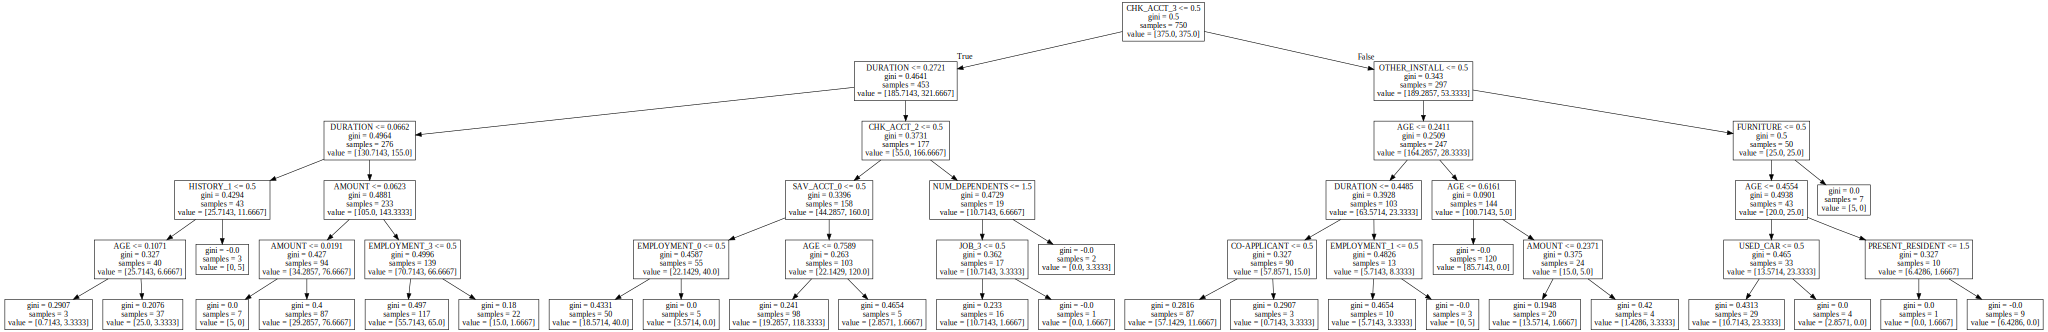

In [138]:
# open .dot & visualize
with open('test_tree.dot', 'r') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

- 무조건 불순도가 감소하는 경우에만 split한다.

In [40]:
# export to .png
# $ dot -Tpng tree.dot -o tree.png


#### 3-3. Interpret Clustering by Decision Tree

In [164]:
# open bath_soap_clustering.df
import pickle
with open('bath_soap_clustering.df', 'rb') as f:
    clustering_df = pickle.load(f)
clustering_df

,SEC,AGE,EDU,HS,Affluence Index,No. of Brands,Brand Runs,Total Volume,No. of Trans,Value,...,SEX_2.0,CHILD_1.0,CHILD_2.0,CHILD_3.0,CHILD_4.0,CHILD_5.0,CS_0.0,CS_1.0,CS_2.0,predicted_labels
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,4.0,4.0,4.0,2.0,-1.316929,-0.403196,0.120123,-0.500799,-0.410639,-0.588348,...,0,0,0,0,1,0,0,1,0,2
1010010.0,4.0,4.0,4.0,2.0,-1.316929,-0.403196,0.120123,-0.500799,-0.410639,-0.588348,...,0,0,0,0,1,0,0,1,0,2
1010020.0,3.0,2.0,4.0,4.0,0.173603,0.863388,0.889935,0.265250,0.507846,0.389804,...,1,0,1,0,0,0,0,1,0,4
1010020.0,3.0,2.0,4.0,4.0,0.173603,0.863388,0.889935,0.265250,0.507846,0.389804,...,1,0,1,0,0,0,0,1,0,4
1014020.0,2.0,4.0,5.0,6.0,0.524317,0.863388,2.044653,1.440072,1.828168,0.693954,...,1,0,0,0,1,0,0,1,0,3
1014020.0,2.0,4.0,5.0,6.0,0.524317,0.863388,2.044653,1.440072,1.828168,0.693954,...,1,0,0,0,1,0,0,1,0,3
1014030.0,4.0,4.0,0.0,0.0,-1.492286,-1.036488,-1.130822,-1.340877,-1.558746,-1.385823,...,0,0,0,0,0,1,1,0,0,2
1014030.0,4.0,4.0,0.0,0.0,-1.492286,-1.036488,-1.130822,-1.340877,-1.558746,-1.385823,...,0,0,0,0,0,1,1,0,0,2
1014190.0,4.0,3.0,4.0,4.0,-0.615502,-0.403196,-0.938369,-0.465393,-1.042098,-0.845489,...,1,0,0,1,0,0,0,1,0,2


In [154]:
X, y = clustering_df.drop('predicted_labels', axis = 1), clustering_df.predicted_labels

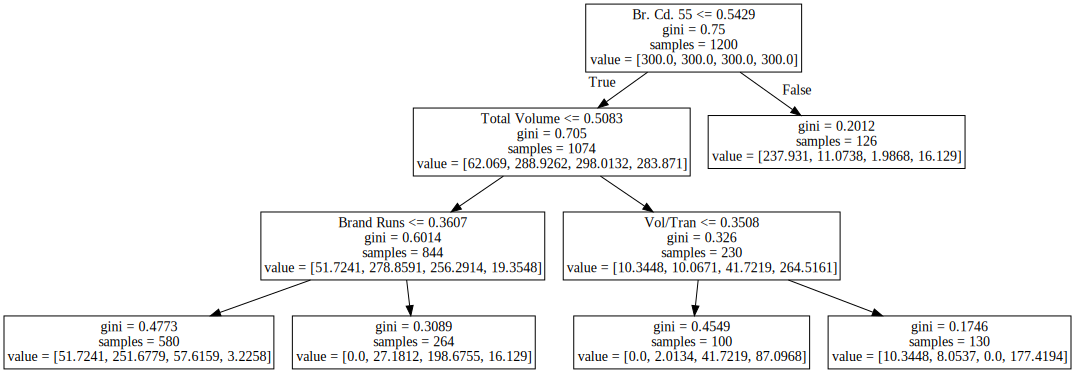

In [157]:
# build DT - max_depth, min_samples_leaf, class_weight
ip_model = DecisionTreeClassifier(max_depth = 3, class_weight = 'balanced', min_samples_leaf=100)
ip_model.fit(X = X, y=y)

# visualize
dot_filename = 'clustering_tree.dot'
with open(dot_filename, 'w') as f:
    export_graphviz(ip_model, f, feature_names=clustering_df.columns)
    
with open(dot_filename, 'r') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph) 

class imbalance가 있을 때 sample 수가 적은 class에 대해서는 상대적으로 학습이 덜 일어납니다. 이러한 imbalance문제를 해결해주기 위해 class weight을 balanced로 맞춰줍니다. 그러면 value는 sample 수에 그에 반비례하는 가중치가 곱해져서 들어가게 됩니다. 

이상으로 의사결정나무에 대해 살펴보았습니다. 의사결정나무는 계산복잡성 대비 높은 예측 성능을 내는 것으로 정평이 나 있습니다. 아울러 변수 단위로 설명력을 지닌다는 강점을 가지고 있습니다. 다만, 의사결정나무는 결정경계(decision boundary)가 데이터 축에 수직이어서 비선형(non-linear) 데이터 분류엔 적합하지 않습니다.

이같은 문제를 극복하기 위해 등장한 모델이 바로 랜덤포레스트입니다. 랜덤포레스트는 같은 데이터에 대해 의사결정나무를 여러 개 만들어서, 그 결과를 종합해 예측 성능을 높이는 기법입니다.

### 4. Random Forest
---
[Random Forest pdf](https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf)
#### 4-1. `sklearn.ensemble.RandomForestClassifier`
---

In [178]:
# import packages
from sklearn.ensemble import RandomForestClassifier

In [179]:
# set parameters
n_estimators = 100
class_weight = 'balanced'
max_depth = 5

In [180]:
# rf_model
rf_model = RandomForestClassifier(n_estimators = n_estimators, class_weight = class_weight, max_depth = max_depth)

In [181]:
# fit to model
rf_model.fit(X = X_train, y = y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [182]:
# get predictions
rf_model.predict(X = X_test)

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [183]:
# get accuracy
rf_model.score(X = X_test, y = y_test)

0.71199999999999997

In [184]:
# result_y_test_df
result_y_test_df['rf'] = rf_model.predict(X = X_test)
result_y_test_df

,RESPONSE,lr,dt,rf
OBS#,,,,
984,0,0,0,0
736,1,1,1,1
205,0,1,1,1
743,0,1,1,1
146,0,1,0,0
450,0,0,0,0
834,1,0,1,0
279,0,0,0,0
806,0,0,0,0


#### 4-2. Change Threshold to Decide 
---

In [186]:
# import numpy
import numpy as np

In [206]:
# change Treshold
# .predict_proba
y_pred_proba = lr_model.predict_proba(X = X_test) # record단위로 0, 1로 배정될 확률을 tuple로
thresholds = np.arange(0, 1, 0.01)

# acurracy
from sklearn.metrics import accuracy_score

y_pred = y_pred_proba[:,1] > 0.8
accuracy_score(y_pred = y_pred, y_true = y_test)

# accuracy_by_threshold
accuracies = []
for t in thresholds:
    y_pred = y_pred_proba[:,1] > t
    print("%s\t :"%(t),accuracy_score(y_pred = y_pred, y_true = y_test))
    accuracies.append(accuracy_score(y_pred = y_pred, y_true = y_test))

0.0	 : 0.3
0.01	 : 0.3
0.02	 : 0.304
0.03	 : 0.308
0.04	 : 0.32
0.05	 : 0.324
0.06	 : 0.336
0.07	 : 0.352
0.08	 : 0.372
0.09	 : 0.384
0.1	 : 0.396
0.11	 : 0.416
0.12	 : 0.424
0.13	 : 0.428
0.14	 : 0.444
0.15	 : 0.456
0.16	 : 0.468
0.17	 : 0.484
0.18	 : 0.492
0.19	 : 0.496
0.2	 : 0.5
0.21	 : 0.512
0.22	 : 0.512
0.23	 : 0.516
0.24	 : 0.52
0.25	 : 0.528
0.26	 : 0.528
0.27	 : 0.536
0.28	 : 0.544
0.29	 : 0.548
0.3	 : 0.572
0.31	 : 0.588
0.32	 : 0.596
0.33	 : 0.608
0.34	 : 0.616
0.35	 : 0.616
0.36	 : 0.632
0.37	 : 0.636
0.38	 : 0.648
0.39	 : 0.648
0.4	 : 0.652
0.41	 : 0.656
0.42	 : 0.672
0.43	 : 0.676
0.44	 : 0.688
0.45	 : 0.688
0.46	 : 0.688
0.47	 : 0.696
0.48	 : 0.7
0.49	 : 0.708
0.5	 : 0.7
0.51	 : 0.696
0.52	 : 0.708
0.53	 : 0.704
0.54	 : 0.708
0.55	 : 0.712
0.56	 : 0.72
0.57	 : 0.724
0.58	 : 0.732
0.59	 : 0.728
0.6	 : 0.728
0.61	 : 0.732
0.62	 : 0.74
0.63	 : 0.736
0.64	 : 0.728
0.65	 : 0.732
0.66	 : 0.728
0.67	 : 0.732
0.68	 : 0.748
0.69	 : 0.756
0.7	 : 0.756
0.71	 : 0.748
0.72	 : 0.752


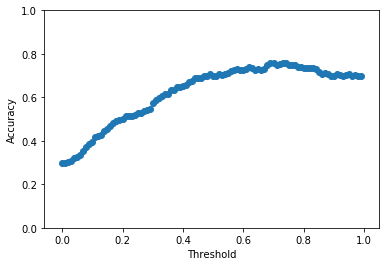

In [207]:
# threshold vs. accuracy score
import matplotlib.pyplot as plt
plt.figure() #도화지를 하나 놓고
plt.scatter(x = thresholds, y = accuracies)
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.ylim([0,1])
plt.show()

class가 imbalance한 경우에 한가지로 찍은 거라 별반 차이가 없음...Accuracy가 아니라 ROC curve로 비교하는게 타당하다.

### 5. 실습 : 우량 등급 예측 모델
---
test set(random_state = 88)에 대한 accuracy가 가장 좋은 모델을 만들어라. 
* Logistic Regression, Decision Tree, Random Forest 중 하나를 사용하라.
* 변수의 개수를 적절히 조절하거나,
* threshold를 변경하거나,
* 모델에 들어갈 parameter를 조절하여라.
* Cross Validation은 고려하지 않는다.

실제로 우량 등급인 사람을 우량 등급으로 예측할 경우 \$100의 이익을 얻는 반면, 실제 불량 등급인 사람을 우량 등급으로 예측할 경우 \$500의 손실을 입는다고 할 때, 로지스틱 모델에서 우량 등급으로 예측을 내리기 위한 최적의 경계값(threshold)를 제시하여라. 
* 위에서 구한 모델에 대한 이익을 계산하여라.
* 10개 이상의 경계값 후보를 살펴보고, 각 경계값별로 이익을 계산하고 최대 이익을 내는 경계값을 찾아라
* 최대 이익을 내는 경계값과 모델의 경계값이 동일한가? 그 이유는 무엇인가?

In [225]:
profits = [100, 0, -500, 0]
report = {}
for t in thresholds:
    y_pred = y_pred_proba[:,1] > t
    #print(t,":",sum(confusion_matrix(y_pred = y_pred, y_true = y_test).ravel() * profits))
    report[t] = sum(confusion_matrix(y_pred = y_pred, y_true = y_test).ravel() * profits)


print("The threshold to make the biggest profit is",max(report, key=lambda key: report[key]))

The threshold to make the biggest profit is 0.19
